# Week 2
##### This week I will create different variations of Phylogenetic trees to analyze Covid-19 genome variations and evolution, focusing on genome distances from the concensus sequence.

## I. Get and Align Covid-19 Genome Data

Following what my Instructor put in his guide, I downloaded sequence data from the Covid-19 Galaxy Project and used Virulign (found <a href="https://github.com/rega-cev/virulign-tutorial">here</a>) to align the downloaded information for easier stand comparisions.

In [7]:
import wget

url = 'https://covid19.galaxyproject.org/genomics/4-Variation/current_complete_ncov_genomes.fasta'
file = './data/current_complete_ncov_genomes.fasta'
wget.download(url, file)

'./data/current_complete_ncov_genomes.fasta'

Then, using a locally downloaded executable of Virulign, I ran the following command to align the sequence information. The downloaded sequence data and the aligned csv file are available <a href="https://nbviewer.jupyter.org/github/anderson-github-classroom/csc-448-project/tree/master/students/nabishop/data/">here</a>. 

The Spike protein acts as a entrance to a human cell and begins the infection process. **Spike proteins are very important for analysis because if you can prevent the proteins from attatching and fusing to human cells, you can prevent people from becoming ill.**

./virulign ./virulign/references/SARS-Cov2-2/S.xml ./data/current_complete_ncov_genomes.fasta --exportAlphabet Nucleotides --exportKind PositionTable > ./position_table.csv

#### The last thing I am going to do is to put the aligned data into an easy to use table using pandas

In [8]:
import pandas as pd

position_table = pd.read_csv('./data/position_table.csv')
position_table

,seqid,S_1_1,S_1_2,S_1_3,S_2_1,S_2_2,S_2_3,S_3_1,S_3_2,S_3_3,...,S_1270_3,S_1271_1,S_1271_2,S_1271_3,S_1272_1,S_1272_2,S_1272_3,S_1273_1,S_1273_2,S_1273_3
0,MT007544.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
1,MT019529.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
2,MT019530.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
3,MT019531.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
4,MT019532.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,MT334544.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
673,MT334546.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
674,MT334547.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
675,MT334557.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A


## II. Build A Distance Matrix From The Consensus Sequence

According to <a href="https://en.wikipedia.org/wiki/Consensus_sequence">Wikipedia</a>, a consensus sequence is "the calculated order of most frequent residues, either nucleotide of amino acid, found at each position in a sequence alignment" and represents a protein binding site. 

First, lets pull out the sequence.

In [9]:
concensus_seq = position_table.drop('seqid',axis=1).mode(axis=0).T[0]
concensus_seq

S_1_1       A
S_1_2       T
S_1_3       G
S_2_1       T
S_2_2       T
           ..
S_1272_2    A
S_1272_3    C
S_1273_1    A
S_1273_2    C
S_1273_3    A
Name: 0, Length: 3819, dtype: object

In [10]:
position_table = position_table.set_index('seqid')

#### Now, lets see which sequences are the farthest from the consensus sequence. Lets pick n=10.

In [11]:
distance_from_concensus_seq = position_table.apply(lambda row: sum(row != concensus_seq),axis=1)
distance_from_concensus_seq_sorted = distance_from_concensus_seq.sort_values(ascending=False)
subset_seqs = distance_from_concensus_seq_sorted[:10].index
subset_seqs

Index(['MT233522.1', 'MT308696.1', 'MT308694.1', 'MT263453.1', 'MT259284.1',
       'MT293180.1', 'MT263436.1', 'MT293224.1', 'MT326129.1', 'MT259277.1'],
      dtype='object', name='seqid')

#### Now, it's time to create that distance matrix using our 10 sequences based off of their distance from the consensus sequence.

In [12]:
distances = {}

for i,seqid1 in enumerate(subset_seqs):
    distances[seqid1,seqid1]=0
    for j in range(i+1,len(subset_seqs)):
        seqid2 = subset_seqs[j]
        distances[seqid1,seqid2] = sum(position_table.loc[seqid1] != position_table.loc[seqid2])
        distances[seqid2,seqid1] = distances[seqid1,seqid2]
distances = pd.Series(distances).unstack()
distances

,MT233522.1,MT259277.1,MT259284.1,MT263436.1,MT263453.1,MT293180.1,MT293224.1,MT308694.1,MT308696.1,MT326129.1
MT233522.1,0,90,115,90,130,104,90,135,151,90
MT259277.1,90,0,43,2,58,32,2,63,79,0
MT259284.1,115,43,0,43,81,47,43,86,104,43
MT263436.1,90,2,43,0,58,32,0,63,79,2
MT263453.1,130,58,81,58,0,68,58,101,119,58
MT293180.1,104,32,47,32,68,0,32,77,93,32
MT293224.1,90,2,43,0,58,32,0,63,79,2
MT308694.1,135,63,86,63,101,77,63,0,22,63
MT308696.1,151,79,104,79,119,93,79,22,0,79
MT326129.1,90,0,43,2,58,32,2,63,79,0


## III. Build The Phylogenetic Tree and Analyze

For creating the Phylogenetic Tree, I will utilize BioPython. BioPython is an awesome resource for bioinformatics algorithm analysis, specifcally for Python! You can find more information about BioPython <a href="https://biopython.org/">here</a>. 

To begin, I will construct I distance matrix specifically in the BioPython format so that it can be later used in the tree. Then, we use BioPython to construct the tree! Super easy.

### Distance Tree

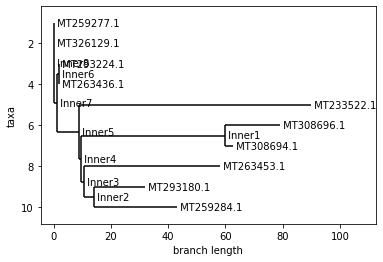

In [13]:
from Bio.Phylo.TreeConstruction import DistanceMatrix, DistanceTreeConstructor
from Bio import Phylo
import numpy as np

### Distance Matrix Construction ###
matrix = np.tril(distances.values).tolist()
for i in range(len(matrix)):
    matrix[i] = matrix[i][:i+1]
dm = DistanceMatrix(list(distances.index), matrix)


### Tree Construction ###
dt_constructor = DistanceTreeConstructor()
dt_tree = dt_constructor.nj(dm)
dt_tree.ladderize()

Phylo.draw(dt_tree)

### Parsimony Tree

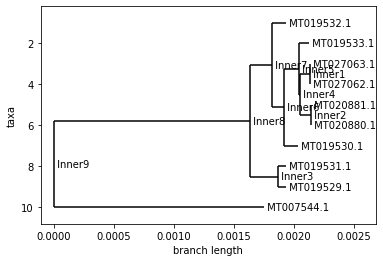

In [14]:
from Bio import AlignIO
from Bio import SeqIO
from Bio import Seq
from Bio import Phylo
from Bio.Phylo.TreeConstruction import *

sequences = list(SeqIO.parse('./data/current_complete_ncov_genomes.fasta', 'fasta'))
sequences = sequences[:10]
maxlen = max(len(sequence.seq) for sequence in sequences)

# pad to ensure all sequences have same length
for sequence in sequences:
    if len(sequence.seq) != maxlen:
        sequence.seq = Seq.Seq(str(sequence.seq).ljust(maxlen, '.'))
        
assert all(len(sequence.seq) == maxlen for sequence in sequences)
        
padded_f = "./data/padded_ncov_genomes.fasta"
with open(padded_f, 'w') as pf:
    SeqIO.write(sequences, pf, 'fasta')

aln = AlignIO.read(padded_f, 'fasta')
scorer = ParsimonyScorer()
searcher = NNITreeSearcher(scorer)
pars_constructor = ParsimonyTreeConstructor(searcher)
pars_tree = pars_constructor.build_tree(aln)

Phylo.draw(pars_tree)